In [21]:
    import numpy as np
    import math
    from datetime import timedelta
    from operator import attrgetter
    from netCDF4 import Dataset
    from netCDF4 import MFDataset
    from collections import defaultdict
    import xarray as xr
    import pandas as pd
    import matplotlib.pyplot as plt
    
    import matplotlib.gridspec as gridspec
    from matplotlib.mlab import griddata
    import seaborn as sns
    import os
    from scipy.interpolate import interp2d

In [22]:
#showing graphs within Python
%matplotlib inline
sns.set()

In [23]:
'''
Written by Chad Valencia, chadvalencia@gmail.com

for David Lindo Atichati, PhD, CUNY

The following will display a graph of number
of eddies and average radius of eddies
as a function of latitude.

'''

'\nWritten by Chad Valencia, chadvalencia@gmail.com\n\nfor David Lindo Atichati, PhD, CUNY\n\nThe following will display a graph of number\nof eddies and average radius of eddies\nas a function of latitude.\n\n'

In [24]:
#importing Cyclonic dataset

In [25]:
cldf = pd.read_csv('./data/cl.csv')

In [26]:
aldf = pd.read_csv('./data/al500.csv')

In [27]:
cldf4 = cldf[cldf['date']>=(4*7)]
cldf8 = cldf[cldf['date']>=(8*7)]
cldf12 = cldf[cldf['date']>=(12*7)]
cldf16 = cldf[cldf['date']>=(16*7)]

aldf4 = aldf[aldf['date']>=(4*7)]
aldf8 = aldf[aldf['date']>=(8*7)]
aldf12 = aldf[aldf['date']>=(12*7)]
aldf16 = aldf[aldf['date']>=(16*7)]



In [28]:
len(cldf4),len(cldf8),len(cldf12),len(cldf16)
len(aldf4),len(aldf8),len(aldf12),len(aldf16)

(891, 180, 40, 12)

In [29]:
mc = cldf.lat2.value_counts().sort_index() #counts number of cyclonic eddies
ma = aldf.lat2.value_counts().sort_index() #counts number of anticyclonic eddies

In [30]:
cradmu = cldf.groupby('lat2').radius.mean()
cradstd = cldf.groupby('lat2').radius.std()

aradmu = aldf.groupby('lat2').radius.mean()
aradstd = aldf.groupby('lat2').radius.std()

ValueError: x and y must have same first dimension, but have shapes (36,) and (0,)

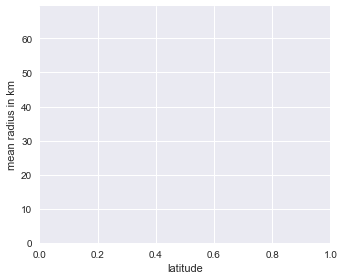

In [31]:
r = [0,1,2,3]
j = [4,8,12,16] #can change values to this number of weeks.

plt.figure(figsize=(12,20))
gs=gridspec.GridSpec(4,2)
gs.update(wspace=.3,hspace=.2)

for i in r:
    c = cldf[cldf['date']>=(i*7)]
    a = aldf[aldf['date']>=(i*7)]
    mc = c.lat2.value_counts().sort_index()
    ma = a.lat2.value_counts().sort_index()
    
    cradmu = c.groupby('lat2').radius.mean()
    cradstd = c.groupby('lat2').radius.std()

    aradmu = a.groupby('lat2').radius.mean()
    aradstd = a.groupby('lat2').radius.std()
    
    clow = cradmu - cradstd
    cupp = cradmu + cradstd
    alow = aradmu - aradstd
    aupp = aradmu + aradstd
    
    ax1a = plt.subplot(gs[i,0])
    ax1a.set_xlabel('latitude')
    ax1a.set_ylabel('mean radius in km')
    ax1a.set_ylim(0, max(cradmu)+max(cradstd))
    ax1a.plot(mc.index[1:-1],cradmu[1:-1], c='lightskyblue')
    ax1a.fill_between(mc.index[1:-1],clow[1:-1],cupp[1:-1],color='lightskyblue', alpha = .3)


    ax1b = ax1a.twinx()
    ax1b.set_ylabel('number of eddies')
    ax1b.set_ylim(0, max(mc)+30)
    ax1b.plot(mc.index[1:-1],mc[1:-1], color='blue')
    plt.title('Cyclonic Eddies, Lifetimes > {} weeks)'.format(j[i]))
    plt.xticks(mc.index)
    
    ax2a = plt.subplot(gs[i,1])
    
    ax2a.set_xlabel('latitude')
    ax2a.set_ylabel('mean radius in km')
    ax2a.set_ylim(0, max(aradmu)+50)
    ax2a.plot(ma.index[1:-1],aradmu[1:-1], c='indianred')
    ax2a.fill_between(ma.index[1:-1],alow[1:-1],aupp[1:-1],color='indianred', alpha = .3)


    ax2b = ax2a.twinx()
    ax2b.set_ylabel('number of eddies')
    ax2b.set_ylim(0, max(ma)+30)
    ax2b.plot(ma.index[1:-1],ma[1:-1], color='red')
    plt.title('Anticyclonic Eddies, Lifetimes > {} weeks)'.format(j[i]))
    plt.xticks(mc.index)

plt.savefig('vis5.png')
plt.show()

In [32]:
mc

15.5    254
16.0    476
16.5    460
17.0    432
17.5    420
18.0    416
18.5    380
19.0    391
19.5    471
20.0    489
20.5    486
21.0    474
21.5    491
22.0    438
22.5    415
23.0    397
23.5    378
24.0    381
24.5    452
25.0    507
25.5    475
26.0    394
26.5    328
27.0    408
27.5    414
28.0    399
28.5    352
29.0    329
29.5    330
30.0    356
30.5    395
31.0    399
31.5    378
32.0    363
32.5    385
33.0    484
33.5    658
34.0    272
Name: lat2, dtype: int64

In [33]:
cradmu

lat2
15.5    40.293980
16.0    38.918213
16.5    39.924285
17.0    41.918450
17.5    40.093394
18.0    39.737687
18.5    42.093217
19.0    43.400775
19.5    40.129881
20.0    38.233772
20.5    35.722528
21.0    35.052869
21.5    35.078322
22.0    36.360061
22.5    36.781246
23.0    35.333019
23.5    36.262985
24.0    37.049509
24.5    38.800784
25.0    37.647874
25.5    34.751032
26.0    34.100646
26.5    37.063765
27.0    39.577314
27.5    38.866612
28.0    37.825628
28.5    39.776358
29.0    37.800183
29.5    37.037067
30.0    37.194640
30.5    36.997868
31.0    37.067951
31.5    37.099833
32.0    35.943618
32.5    33.602657
33.0    33.545729
33.5    32.631811
34.0    32.220515
Name: radius, dtype: float64